In [1]:
import datetime
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import timedelta


# Creación del dataframe

Hemos perdido el .txt por no poder completar el ejercicio en clase, ya que tuvimos varios problemas. Por tanto, creamos una dataframe con números aleatorios que simula lo que sería el resultado de transformar ese archivo

In [2]:
now = datetime.datetime.now()

times_list = []
euros_list = []
for i in range(30):
    now = now + timedelta(minutes=1)
    current_time = now.strftime('%b %d, %Y %H:%M:%S') + ' UTC'
    times_list.append(current_time)
    number = random.uniform(10000,40000)
    euros_list.append(number)

df_money = {'timestamp': times_list,
            'bpi':euros_list
            }

df_money = pd.DataFrame(df_money)


In [3]:
df_money.head()


,timestamp,bpi
0,"Dec 02, 2022 21:40:43 UTC",23145.014126
1,"Dec 02, 2022 21:41:43 UTC",11023.752396
2,"Dec 02, 2022 21:42:43 UTC",39705.276209
3,"Dec 02, 2022 21:43:43 UTC",36575.135352
4,"Dec 02, 2022 21:44:43 UTC",24984.219707


# Conversión del dataframe a tabla de sql

Realizamos la conexión. Como no hay base de datos a la que conectarse con ese nombre, nos la hace

In [4]:
conn = sqlite3.connect('base_de_datos.db')


Creamos el comando, o cursor

In [5]:
cursor = conn.cursor()


Creamos la tabla

In [6]:
q = '''CREATE TABLE IF NOT EXISTS money
(fecha TIME,
bpi FLOAT
)
'''

cursor.execute(q)


Creamos una lista de tuplas con los valores del dataframe. Cada tupla es una fecha con su rate correspondiente

In [7]:
my_var = list(zip(df_money['timestamp'], df_money['bpi']))

my_var


[('Dec 02, 2022 21:40:43 UTC', 23145.014126209444),
 ('Dec 02, 2022 21:41:43 UTC', 11023.752396165975),
 ('Dec 02, 2022 21:42:43 UTC', 39705.27620939177),
 ('Dec 02, 2022 21:43:43 UTC', 36575.135352034595),
 ('Dec 02, 2022 21:44:43 UTC', 24984.21970662855),
 ('Dec 02, 2022 21:45:43 UTC', 24659.059852044615),
 ('Dec 02, 2022 21:46:43 UTC', 38862.30239969262),
 ('Dec 02, 2022 21:47:43 UTC', 13110.061894911667),
 ('Dec 02, 2022 21:48:43 UTC', 39372.80327871817),
 ('Dec 02, 2022 21:49:43 UTC', 27727.6002659869),
 ('Dec 02, 2022 21:50:43 UTC', 20785.834426320238),
 ('Dec 02, 2022 21:51:43 UTC', 23737.223397738617),
 ('Dec 02, 2022 21:52:43 UTC', 13104.612672040581),
 ('Dec 02, 2022 21:53:43 UTC', 17151.32017757304),
 ('Dec 02, 2022 21:54:43 UTC', 35973.84985155816),
 ('Dec 02, 2022 21:55:43 UTC', 27058.449786553098),
 ('Dec 02, 2022 21:56:43 UTC', 28589.800529166223),
 ('Dec 02, 2022 21:57:43 UTC', 32214.001926628203),
 ('Dec 02, 2022 21:58:43 UTC', 25185.356181147683),
 ('Dec 02, 2022 21:5

Mediante executemany y con nuestra lista de tuplas, metemos todos los valores de las columnas de nuestro dataframe (df_money) a las respectivas de la tabla (money) que hemos creado (timestamp -> fecha, bpi -> bpi)

In [8]:
q = '''
INSERT INTO money
(fecha, bpi)
VALUES (?, ?)
'''

# Ambos son necesarios siempre al hacer una query, tanto el execute como el commit
cursor.executemany(q, my_var)
conn.commit()


Alternativa pobre (no vas metiendo los datos uno a uno, así que no es práctico si hay que hacerlo periódicamente) pero rápida, con la base de datos creada (que no la tabla)

In [9]:
# df_money.to_sql('money', conn)


Sea cual sea la opción elegida, cerramos al terminar

In [10]:
conn.close()


# Gráfico de precio vs tiempo

In [11]:
df_money.head()


,timestamp,bpi
0,"Dec 02, 2022 21:40:43 UTC",23145.014126
1,"Dec 02, 2022 21:41:43 UTC",11023.752396
2,"Dec 02, 2022 21:42:43 UTC",39705.276209
3,"Dec 02, 2022 21:43:43 UTC",36575.135352
4,"Dec 02, 2022 21:44:43 UTC",24984.219707


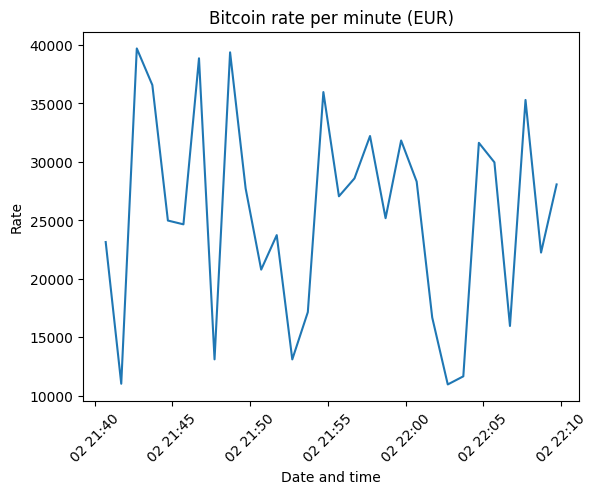

In [12]:
df_money['timestamp'] = df_money['timestamp'].apply(lambda x: x.split()[3])
df_money['timestamp'] = pd.to_datetime(df_money['timestamp'])
df_money.set_index(df_money['timestamp'], inplace=True)
df_money.drop(columns='timestamp', inplace=True)
sns.lineplot(df_money, legend=False)
plt.ylabel(ylabel='Rate')
plt.xlabel(xlabel='Date and time')
plt.title('Bitcoin rate per minute (EUR)')
plt.tick_params(axis='x', labelrotation = 45)
plt.show()
